# Feature Selection for High/Low Google Ratings from Health Score using violation categories

The Chi-Square test is used in feature selection to test the relationship between features and the predicted target which helps determine the best features to build the machine learning model. For machine learning, we want features that relate strongly to the target prediciton. Small Chi-Square values indicate the feature and target are indepedent from each other. High Chi-Square values indicate that the feature and target are dependent and therefore those features are good candidates for model training. 

In this activity, two different datasets were used for feature selection: violation categories (did a facility ever get a particular type of violation) and violation counts (how often did a facility receive a particular violation). 

Results: Violation Categories show the type of facility more closely dependent (higher chi-square values) to the target. The highest facilities categories were Restaurant with >200 seats and small facilities - Limited Food Service, Convenience. Examples of Restaurants with >200 seats are corporate facilities such as Red Robin and Texas Roadhouse as well as local favorites The Roost and Beau Jo's. Example of Limited Food Service, Convenience range from local coffee shops to Starbucks.

Violation Counts revealed the highest dependency on Water/Sewage and Toilets/Handwashing. Facility type definitely influenced these results. These results correlate well with the restaurant-industry addage, for the best health inspection scores, Start in the Restroom!

The top 7 features were used to compare Machine Learning Models.

Feature 0: 1.551916
Feature 1: 0.015650
Feature 2: 0.190643
Feature 3: 1.352945
Feature 4: 0.183811
Feature 5: 0.049675
Feature 6: 1.540904
Feature 7: 2.951635
Feature 8: 0.430799
Feature 9: 0.194362
Feature 10: 0.051947
Feature 11: 1.231200
Feature 12: nan
Feature 13: nan
Feature 14: nan
Feature 15: 3.833296
Feature 16: 0.194781
Feature 17: 1.149163
Feature 18: 0.070691
Feature 19: 0.117681
Feature 20: 6.002714
Feature 21: 0.955289
Feature 22: 1.589830
Feature 23: 0.097353
Feature 24: 0.678901
Feature 25: 0.194781
Feature 26: 0.716628
Feature 27: 0.001883


C:\Users\scheir3\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


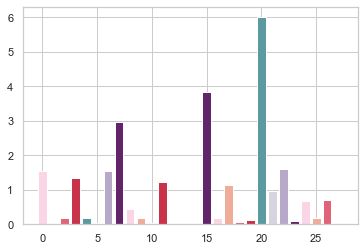

In [9]:
# Feature selection for High/Low Google ratings from Health Score using violation categories.
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('feature_vio_cat.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
c=['#f9d5e5', '#eeac99', '#e06377', '#c83349', '#5b9aa0', '#d6d4e0', '#b8a9c9', '#622569', 
   '#f9d5e5', '#eeac99', '#e06377', '#c83349', '#5b9aa0', '#d6d4e0', '#b8a9c9', '#622569', 
   '#f9d5e5', '#eeac99', '#e06377', '#c83349', '#5b9aa0', '#d6d4e0', '#b8a9c9', '#622569',
   '#f9d5e5', '#eeac99', '#e06377']
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_, color=c)
pyplot.show()

# Feature Select for High/Low Google Ratings using Health Scores and violation counts 

C:\Users\scheir3\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Feature 0: 0.555805
Feature 1: 0.064826
Feature 2: 1.680677
Feature 3: 8.662600
Feature 4: 3.719521
Feature 5: 0.060941
Feature 6: 1.420539
Feature 7: 1.215725
Feature 8: 1.671527
Feature 9: 0.587391
Feature 10: 0.007717
Feature 11: 1.532882
Feature 12: nan
Feature 13: nan
Feature 14: nan
Feature 15: 3.833296
Feature 16: 0.194781
Feature 17: 1.149163
Feature 18: 0.070691
Feature 19: 0.117681
Feature 20: 6.002714
Feature 21: 0.955289
Feature 22: 1.589830
Feature 23: 0.097353
Feature 24: 0.678901
Feature 25: 0.194781
Feature 26: 0.716628
Feature 27: 0.001883


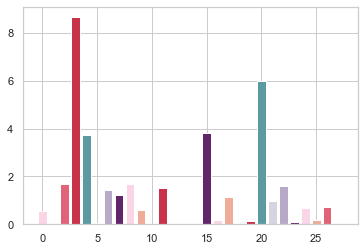

In [10]:
# Feature selection for High/Low Google rating from Health Score using violation COUNTS and facility type/category
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('features_counts.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
c=['#f9d5e5', '#eeac99', '#e06377', '#c83349', '#5b9aa0', '#d6d4e0', '#b8a9c9', '#622569', 
   '#f9d5e5', '#eeac99', '#e06377', '#c83349', '#5b9aa0', '#d6d4e0', '#b8a9c9', '#622569', 
   '#f9d5e5', '#eeac99', '#e06377', '#c83349', '#5b9aa0', '#d6d4e0', '#b8a9c9', '#622569',
   '#f9d5e5', '#eeac99', '#e06377']
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_, color=c)
pyplot.show()